### 01. Importing The Dependencies :

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


### 02. Data collection & Processing:

In [30]:
# Load the data from csv file to pandas DataFrame
from google.colab import files
uploaded = files.upload()

Saving netflix_titles.csv to netflix_titles (1).csv


In [31]:
# printing the first five rows of the DataFrame.
netflix_data = pd.read_csv('netflix_titles.csv')
netflix_data.head()


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


### 03. Primary dataset analysis

In [32]:
# Finding the numbers of rows and columns
netflix_data.shape

(8807, 12)

In [33]:
# Finding the information of the netflix dataset
netflix_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [34]:
# cheack the number of missing value of each coloumn
netflix_data.isnull().sum()

,0
show_id,0
type,0
title,0
director,2634
cast,825
country,831
date_added,10
release_year,0
rating,4
duration,3


In [35]:
# Basic Data understanding
netflix_data.describe(include='all')

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
count,8807,8807,8807,6173,7982,7976,8797,8807.000000,8803,8804,8807,8807
unique,8807,2,8807,4528,7692,748,1767,NaN,17,220,514,8775
top,s8807,Movie,Zubaan,Rajiv Chilaka,David Attenborough,United States,"January 1, 2020",NaN,TV-MA,1 Season,"Dramas, International Movies","Paranormal activity at a lush, abandoned prope..."
freq,1,6131,1,19,19,2818,109,NaN,3207,1793,362,4
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014.180198,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.819312,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1925.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019.000000,NaN,NaN,NaN,NaN


### 04. Handling The missing and duplicate values

In [36]:
# Replacing the missing value in 'director' column with value of 'Unknown'.
netflix_data['director'].fillna('unknown',inplace=True)
# Replacing the missing value in 'cast' column with value of 'unknown'.
netflix_data['cast'].fillna('unknown', inplace= True)
# Replacing the missing value in 'country' column with the value of 'unknown'.
netflix_data['country'].fillna('unknown', inplace=True)
# Changing the date formation.
netflix_data['date_added']= pd.to_datetime(netflix_data['date_added'],errors='coerce')
# Replacing the missing values in 'date_added' column with the common value of this column.
netflix_data['date_added'].fillna(netflix_data['date_added'].mode()[0],inplace=True)
# Replacing the missingj value in 'rating' column with the common values of this column.
netflix_data['rating'].fillna(netflix_data['rating'].mode()[0],inplace= True)
# Replacing the missing values in 'duration'columns by columns of 'type' of movie and Tv_show.
movie_mean=netflix_data[netflix_data['type']== 'Movie']['duration'].str.replace('min','').astype(float).mean()
tv_show_median = netflix_data[netflix_data['type'] == 'TV Show']['duration'].str.extract('(\d+)').astype(float).median()
netflix_data['duration']=netflix_data['duration'].fillna(netflix_data['type'].map({'Movie':movie_mean,'TV Show':tv_show_median}))

<>:15: SyntaxWarning: invalid escape sequence '\d'
<>:15: SyntaxWarning: invalid escape sequence '\d'
/tmp/ipython-input-2488652824.py:15: SyntaxWarning: invalid escape sequence '\d'
  tv_show_median = netflix_data[netflix_data['type'] == 'TV Show']['duration'].str.extract('(\d+)').astype(float).median()
/tmp/ipython-input-2488652824.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  netflix_data['director'].fillna('unknown',inplace=True)
/tmp/ipython-input-2488652824.py:4: FutureWarning: A value is trying to be set on a copy

In [37]:
# Deleting the duplicate data.
netflix_data.drop_duplicates(inplace=True)

### 05. Basic Data Understanding

In [38]:
# Finding the unique value.
netflix_data.nunique()

,0
show_id,8807
type,2
title,8807
director,4529
cast,7693
country,749
date_added,1699
release_year,74
rating,17
duration,221


In [39]:
# Finding the number of movies and tv shows.
movies = netflix_data[netflix_data['type']== 'Movie']
tv_shows = netflix_data[netflix_data['type']== 'TV Show']
print('Number of movies :',len(movies))
print('Number of tv shows :',len(tv_shows))

Number of movies : 6131
Number of tv shows : 2676


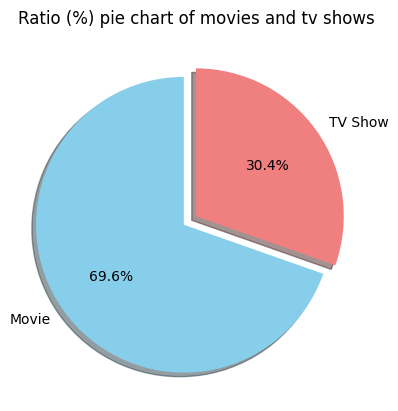

In [40]:
# Ratio (%) pie chart of movies and tv shows.
netflix_data['type'].value_counts().plot(kind = 'pie',autopct = '%1.1f%%',colors = ['skyblue','lightcoral'],startangle = 90,shadow = True,explode = (0.1,0))
plt.title('Ratio (%) pie chart of movies and tv shows')
plt.ylabel('')
plt.show()

In [41]:
# Finding the top movies and tv shows director.
top_movie_director = movies['director'].value_counts().head()
top_tv_show_director = tv_shows['director'].value_counts().head()
print('Top movies director \n',top_movie_director)
print('Top tv shows director \n',top_tv_show_director)

Top movies director 
 director
unknown                   188
Rajiv Chilaka              19
Raúl Campos, Jan Suter     18
Suhas Kadav                16
Marcus Raboy               15
Name: count, dtype: int64
Top tv shows director 
 director
unknown                2446
Alastair Fothergill       3
Rob Seidenglanz           2
Ken Burns                 2
Stan Lathan               2
Name: count, dtype: int64


In [42]:
# Finding the top movie and tv shows cast.
top_movie_cast = movies['cast'].value_counts().head(5)
top_tv_show_cast = tv_shows['cast'].value_counts().head(5)
print('Top movie cast \n',top_movie_cast)
print('Top tv show cast \n',top_tv_show_cast)

Top movie cast 
 cast
unknown                                                                                    475
Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jigna Bhardwaj, Rajesh Kava, Mousam, Swapnil     13
Samuel West                                                                                 10
Jeff Dunham                                                                                  7
Kevin Hart                                                                                   6
Name: count, dtype: int64
Top tv show cast 
 cast
unknown                                                                      350
David Attenborough                                                            14
Michela Luci, Jamie Watson, Anna Claire Bartlam, Dante Zee, Eric Peterson      4
Dave Chappelle                                                                 3
Nicholas Day                                                                   2
Name: count, dtype: int64


In [43]:
# Finding the top movie and tv show relased country.
top_movie_country = movies['country'].value_counts().head(5)
top_tv_show_country = tv_shows['country'].value_counts().head(5)
print('Top movie relased country \n', top_movie_country)
print('Top tv shows relased country \n',top_tv_show_country)

Top movie relased country 
 country
United States     2058
India              893
unknown            440
United Kingdom     206
Canada             122
Name: count, dtype: int64
Top tv shows relased country 
 country
United States     760
unknown           391
United Kingdom    213
Japan             169
South Korea       158
Name: count, dtype: int64


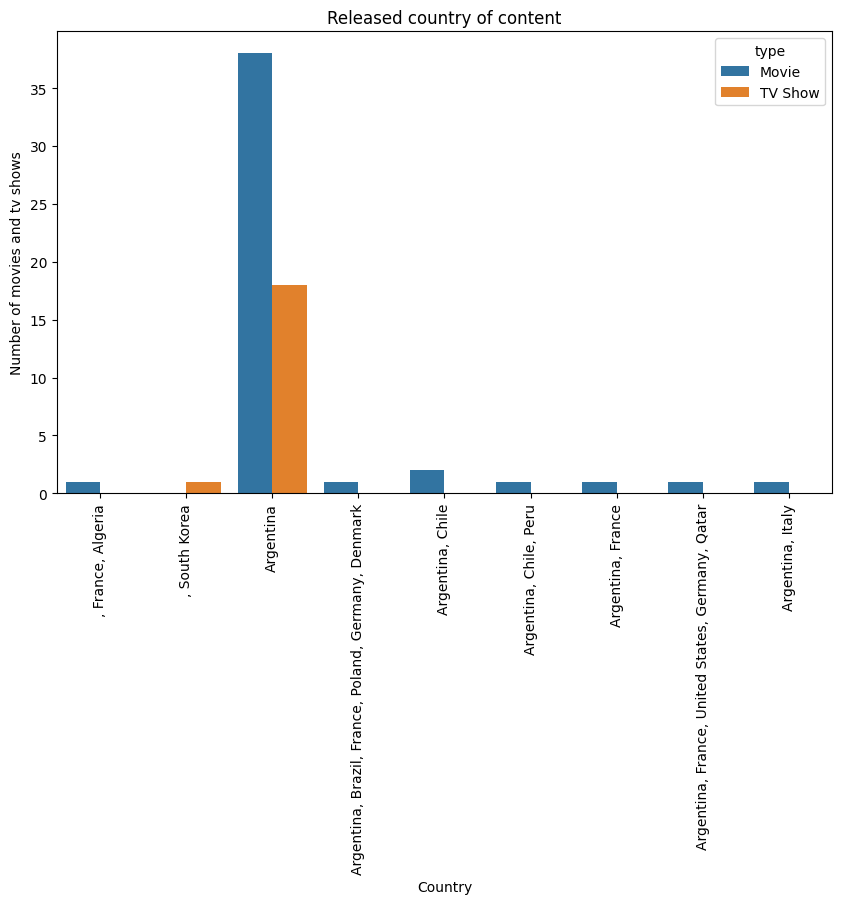

In [44]:
# Finding the released country of content by bar plot.
# counting movies and tv shows by released country.
counting_released_country= netflix_data.groupby(['country','type']).size().reset_index(name= "count").head(10)
plt.figure(figsize=(10,6))
sns.barplot(x='country',y='count',hue='type',data= counting_released_country)
plt.xticks(rotation=90)
plt.title('Released country of content')
plt.xlabel('Country')
plt.ylabel('Number of movies and tv shows')
plt.show()

In [45]:
# Finding the top movies and tv shows date_added.
top_movie_date_added = movies['date_added'].value_counts().head(5)
top_tv_show_date_added = tv_shows['date_added'].value_counts().head(5)
print('Top movie date added \n',top_movie_date_added)
print('Top tv show date added \n',top_tv_show_date_added)

Top movie date added 
 date_added
2020-01-01    97
2019-11-01    75
2018-03-01    72
2019-12-31    67
2018-10-01    64
Name: count, dtype: int64
Top tv show date added 
 date_added
2020-01-01    110
2021-07-06     31
2016-01-01     23
2017-08-01     22
2021-06-19     21
Name: count, dtype: int64


In [46]:
# Finding the top movies and tv shows release_year.
top_movie_release_year = movies['release_year'].value_counts().head(5)
top_tv_show_release_year = tv_shows['release_year'].value_counts().head(5)
print('Top movie release year \n',top_movie_release_year)
print('Top tv show release year \n',top_tv_show_release_year)

Top movie release year 
 release_year
2017    767
2018    767
2016    658
2019    633
2020    517
Name: count, dtype: int64
Top tv show release year 
 release_year
2020    436
2019    397
2018    380
2021    315
2017    265
Name: count, dtype: int64


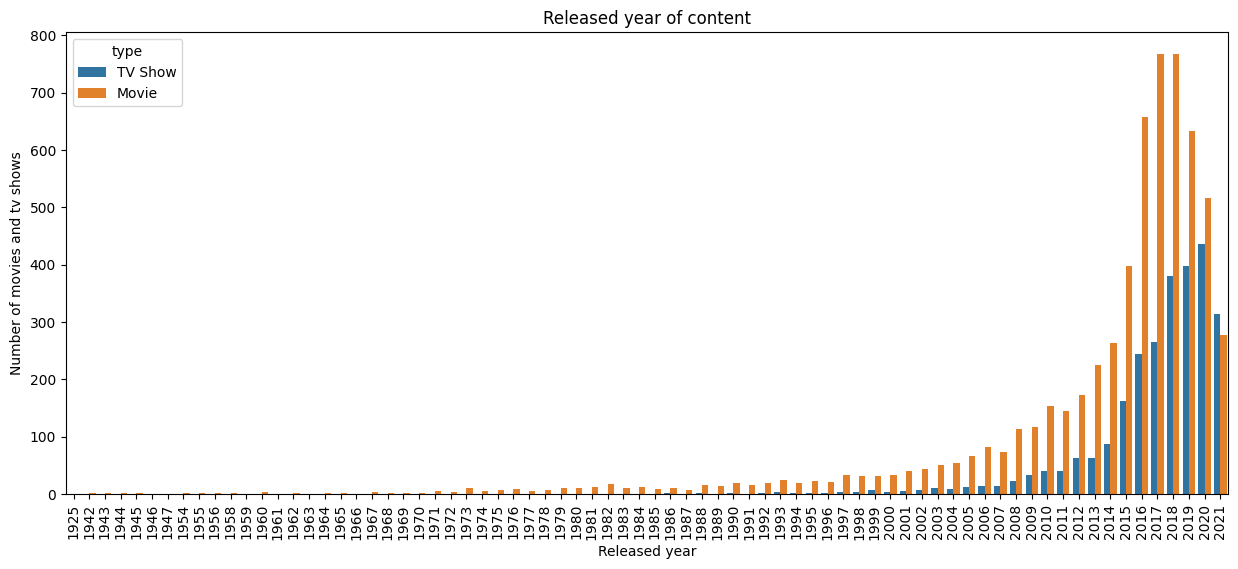

In [47]:
# Finding the released year of content by bar plot.
# counting movies and tv shows by released year.
counting_released_year= netflix_data.groupby(['release_year','type']).size().reset_index(name= "count")
plt.figure(figsize=(15,6))
sns.barplot(x='release_year',y='count',hue='type',data=counting_released_year)
plt.xticks(rotation=90)
plt.title('Released year of content')
plt.xlabel('Released year')
plt.ylabel('Number of movies and tv shows')
plt.show()


Text(0, 0.5, 'Number of movies and tv shows')

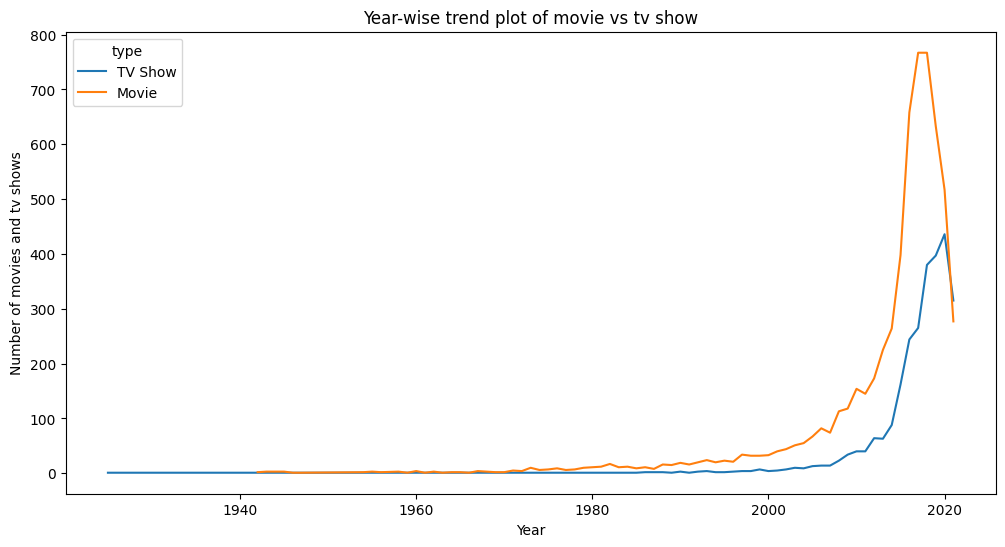

In [48]:
# Year-wise trend plot of movie vs tv show.
# counting movies and tv shows by year.
trend= netflix_data.groupby(['release_year','type']).size().reset_index(name='count')
plt.figure(figsize=(12,6))
sns.lineplot(x='release_year',y='count',hue='type',data=trend)
plt.title('Year-wise trend plot of movie vs tv show')
plt.xlabel('Year')
plt.ylabel('Number of movies and tv shows')


In [49]:
# Finding the top movies and tv shows Rating.
top_movie_rating = movies['rating'].value_counts().head(5)
top_tv_show_rating = tv_shows['rating'].value_counts().head(5)
print('Top movie rating \n',top_movie_rating)
print('Top tv show rating \n',top_tv_show_rating)

Top movie rating 
 rating
TV-MA    2064
TV-14    1427
R         797
TV-PG     540
PG-13     490
Name: count, dtype: int64
Top tv show rating 
 rating
TV-MA    1147
TV-14     733
TV-PG     323
TV-Y7     195
TV-Y      176
Name: count, dtype: int64


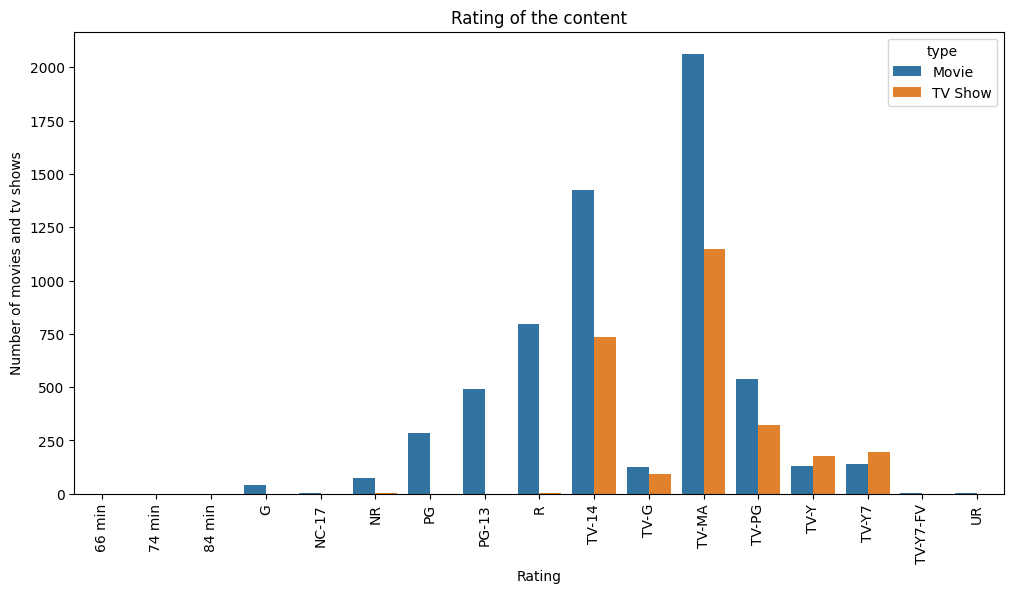

In [50]:
# Finding the rating of the content by bar plot.
# counting movies and tv shows by rating.
counting_rating= netflix_data.groupby(['rating','type']).size().reset_index(name= "count")
plt.figure(figsize=(12,6))
sns.barplot(x='rating',y='count',hue='type',data=counting_rating)
plt.xticks(rotation=90)
plt.title('Rating of the content')
plt.xlabel('Rating')
plt.ylabel('Number of movies and tv shows')
plt.show()

In [51]:
# Finding the top movies and tv shows duration.
top_movie_duration = movies['duration'].value_counts().head(5)
top_tv_show_duration = tv_shows['duration'].value_counts().head(5)
print('Top movie duration \n',top_movie_duration)
print('Top tv show duration \n',top_tv_show_duration)

Top movie duration 
 duration
90 min    152
94 min    146
97 min    146
93 min    146
91 min    144
Name: count, dtype: int64
Top tv show duration 
 duration
1 Season     1793
2 Seasons     425
3 Seasons     199
4 Seasons      95
5 Seasons      65
Name: count, dtype: int64


In [52]:
# Finding the top movies and tv shows listed_in.
top_movie_listed_in = movies['listed_in'].value_counts().head(5)
top_tv_show_listed_in = tv_shows['listed_in'].value_counts().head(5)
print('Top movie listed in \n',top_movie_listed_in)
print('Top tv show listed in \n',top_tv_show_listed_in)

Top movie listed in 
 listed_in
Dramas, International Movies                        362
Documentaries                                       359
Stand-Up Comedy                                     334
Comedies, Dramas, International Movies              274
Dramas, Independent Movies, International Movies    252
Name: count, dtype: int64
Top tv show listed in 
 listed_in
Kids' TV                                             220
International TV Shows, TV Dramas                    121
Crime TV Shows, International TV Shows, TV Dramas    110
Kids' TV, TV Comedies                                 99
Reality TV                                            95
Name: count, dtype: int64


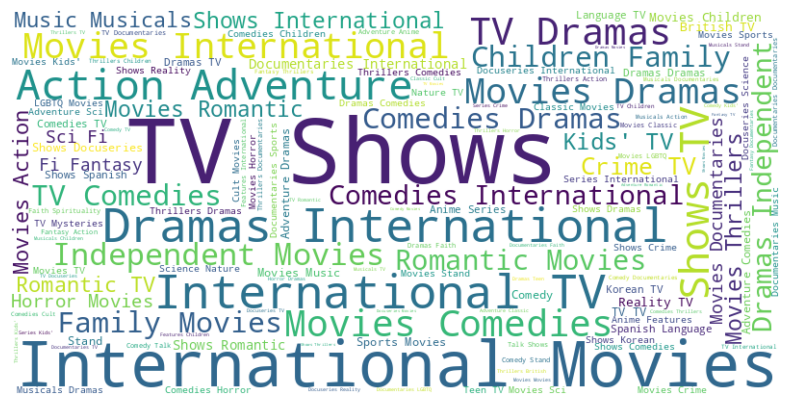

In [53]:
# Creating a wordcloud from listed entry into dataset.
from wordcloud import WordCloud
listed_in_text = ' '.join(netflix_data['listed_in'].dropna())
wordcloud = WordCloud(width=800,height=400,background_color='white').generate(listed_in_text)
plt.figure(figsize=(10,5))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

# ***Content type***
### Observation 01:

Netflix has 69.6% of movies and 30.4% of tv shows.

This means that Netflix is primarily a movie- based platfrom. Although the number of Tv Shows is also growing rapidly.

# ***Directors***
### Observation 02:
Netflix has multiple movies by a director. In comparision, the number of tv shows by a director is negligible.

This indicates Netflix's variety production strategy of huge number of director.



# ***Cast***
### Observation 03:

Certain actors ( such as popular Bollywood ar Hollywood stars ) have been featured repeatedly in many of Netflix content.

This shows that Netflix wants to use popular faces to attract viewers.


# ***Country-wise***
### Observation 04:

The most content on Netflix comes from the USA, followed by India and the United Kingdom.

Netflix's main production and licensed content market is USA-centric.

### Observation 05:

The amount of content from developing countries is relatively low, but content from South Korea and Japan has increased in the last few years.

This indicates Netflix's global expansion.



# ***Year-wise Trend***

### Observation 06:

Netflix had the highest rate of new content additions from 2017 to 2020.

This indicates Netflix's aggressive expansion strategy at that time.

### Observation 07:

The number of new content has decreased slightly since 2021.

Probably due to the post-pandemic production slowdown.



# ***Rating***

### Observation 08:

“TV-MA” and “TV-14” ratings are the highest.

This means that most of Netflix’s content is for mature or teen-adult audiences.

### Observation 09:

“PG” and “G” rated content is relatively low.

Netflix’s children-focused content is relatively low.

# ***Duration***

### Observation 10:

The average length of movies is about 90 minutes, with most movies between 80–120 minutes.

This is consistent with standard film duration.

### Observation 11:

Some short documentaries or stand-up specials are under 30 minutes.

Netflix is ​​experimenting with content of different lengths.

# ***Genre***

### Observation 12:

The most commonly used genres are “Drama”, “International Movies”, and “Comedy”.

This indicates the type of content Netflix viewers prefer (emotional and entertainment based).

### Observation 13:

The number of Horror or Documentary content is relatively small, but there is a niche audience.

# ***Date Added / Month Trend***

### Observation 14:

The most content is added between July and December each year.

Probably due to new releases during the holiday season or towards the end of the year.



# ***Overall***

### Observation 15:

Netflix's content library is becoming increasingly global and diverse.

 The growth of drama and international content is evidence that Netflix is ​​targeting new regions.